<a href="https://colab.research.google.com/github/yugandharMohite/SWATH-Health-Portal/blob/main/ARIMA_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

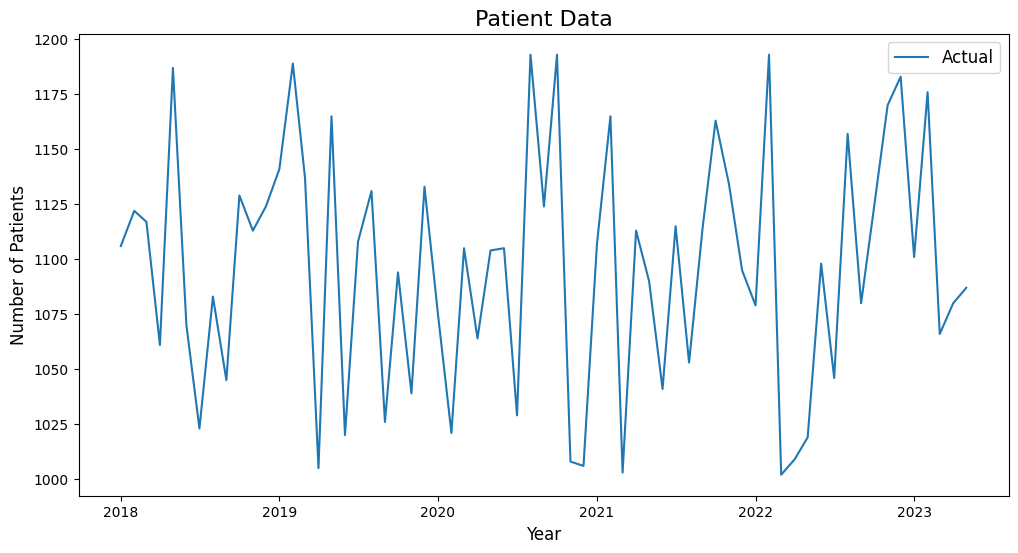

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


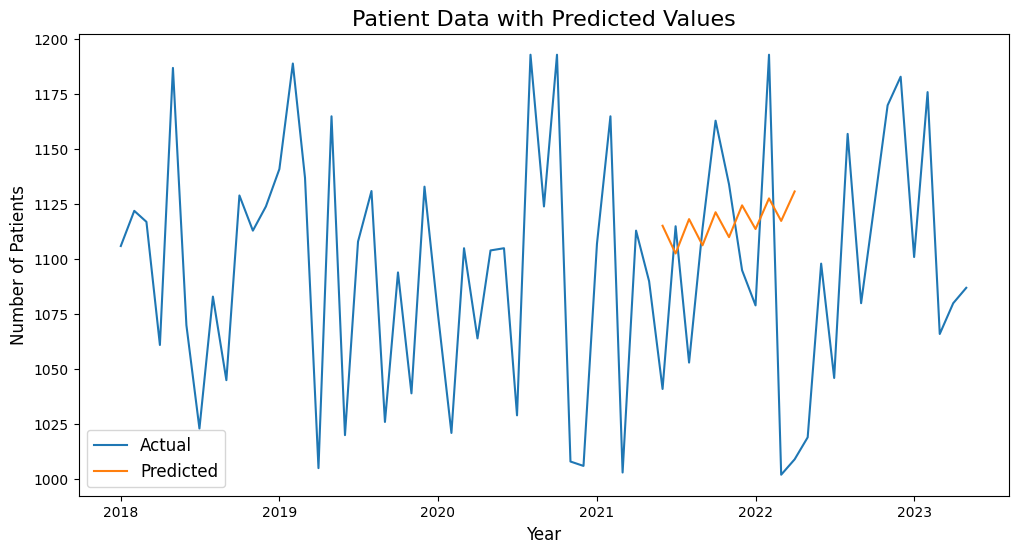

Root Mean Squared Error (RMSE): 22.42
            patients
date                
2018-01-01      1106
2018-02-01      1122
2018-03-01      1117
2018-04-01      1061
2018-05-01      1187
2018-06-01      1070
2018-07-01      1023
2018-08-01      1083
2018-09-01      1045
2018-10-01      1129
2018-11-01      1113
2018-12-01      1124
2019-01-01      1141
2019-02-01      1189
2019-03-01      1137
2019-04-01      1005
2019-05-01      1165
2019-06-01      1020
2019-07-01      1108
2019-08-01      1131
2019-09-01      1026
2019-10-01      1094
2019-11-01      1039
2019-12-01      1133
2020-01-01      1075
2020-02-01      1021
2020-03-01      1105
2020-04-01      1064
2020-05-01      1104
2020-06-01      1105
2020-07-01      1029
2020-08-01      1193
2020-09-01      1124
2020-10-01      1193
2020-11-01      1008
2020-12-01      1006
2021-01-01      1107
2021-02-01      1165
2021-03-01      1003
2021-04-01      1113
2021-05-01      1090
2021-06-01      1041
2021-07-01      1115
2021-08-01      1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


date_rng = pd.date_range(start='1/1/2018', end='5/1/2023', freq='MS')
data = pd.DataFrame(date_rng, columns=['date'])
data['patients'] = np.random.randint(1000,1200,size=(len(date_rng)))
data.set_index('date', inplace=True)


plt.figure(figsize=(12,6))
plt.plot(data, label='Actual')
plt.title('Patient Data', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(fontsize=12)
plt.show()


model = ARIMA(data, order=(1, 2, 4))
results = model.fit()

future_dates = pd.date_range(start='5/6/2021', end='5/1/2022', freq='MS')
future_predictions = results.predict(start=len(data), end=len(data)+10, dynamic=False, typ='levels')
future_dates = future_dates[:-1]  # Remove last date to match length of predictions
future_data = pd.DataFrame({'date': future_dates, 'patients': future_predictions})
future_data.set_index('date', inplace=True)


plt.figure(figsize=(12,6))
plt.plot(data, label='Actual')
plt.plot(future_data, label='Predicted')
plt.title('Patient Data with Predicted Values', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.legend(fontsize=12)
plt.show()


mse = ((future_data['patients'] - data['patients'].mean()) ** 2).mean()
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))


print(data.to_string())
